## **Fraud Credit Card With Imbalance Data**
**Author**: Phan An Duy - 518H0616 || Lam Ngoc Hai - 518H0437

**Project**: DACNTT(2)

This project is created and collected through the website. With our main dataset come from Kaggle. Credit Fraud Detection, using dataset from it, read from ```pandas```, ```pytorch```,

This project meant to work with scaling the dataset

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import math

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### **1. Understanding our data**

Reading out the dataset, fully formatted. For this is to having a glimpse of what is coming about the dataset, about the imbalance column, value, data, and numbers. From there we will have a look on what we are working on the dataset

Also on this dataset, we'll try to cover it all the rows and columns, to have a better sense on what we are working on.

- **id**: Unique identifier for each transaction
- **V1-V28**: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- **Amount**: The transaction amount
- **Class**: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [3]:
df = pd.read_csv("creditcard.csv")

To begin with the dataset, let's see how to dataset went

In [4]:
# The classes are heavily skewed we need to solve this issue later.
print('We have detected no Frauds Credit', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('We have detected Frauds Credit', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

We have detected no Frauds Credit 99.83 % of the dataset
We have detected Frauds Credit 0.17 % of the dataset


As at the time we detection, with non format all the dataset we can find the data value seem to be off set to no Frauds Credit, with the majority of ```99.83%``` of the value and only ```0.17%``` are the Frauds one

Definition: Because most of the transaction need to be secure during all the transaction, with many transaction need to be secure before can other transaction can be made. So the value contain the fraud only ```0.17%``` of the all the transaction made it. The dataset are validate to use as a research purpose



<Axes: xlabel='Class', ylabel='count'>

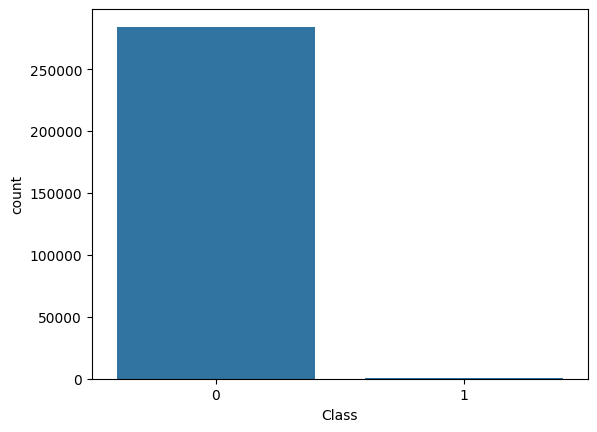

In [5]:
sns.countplot(x='Class', data=df)

Dataset for the testing out the dataset. With the fraudulent rate of ```0.17%``` hence the dataset rate of fraudent transaction are rare due to the security of the transaction. Hence the dataset are imbalance on one side 

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### **Result meaning**
The result above mean about the fraud numbers we about to figure it out. The dataset are varie
 and show the imbalance of the each transaction between V1-V28


In [7]:
plt.figure(figsize=(15,15))
t = 1
for i in dataset.columns:
  plt.subplot(7,5,t)
  sns.histplot(df[i], kde= True)
  plt.title(i+' Distribution')
  t+= 1
plt.tight_layout()
plt.show()

NameError: name 'dataset' is not defined

<Figure size 1500x1500 with 0 Axes>

### **Data Preprocessing**
This section start from here to pre-process all the dataset into a trainable one

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [9]:
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

### **Undersampling the Dataset**

In [10]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [11]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
35686,-0.104800,-0.545942,-0.421659,0.517644,1.558363,0.063718,-0.683353,0.771503,-0.777820,0.832825,...,-0.171075,0.299321,0.913125,-0.077767,-0.719265,-0.468665,0.482179,-0.025145,-0.020702,0
252124,-0.296653,0.833774,-1.928613,4.601506,-7.124053,5.716088,1.026579,-3.189073,-2.261897,1.185096,...,0.328796,0.602291,-0.541287,-0.354639,-0.701492,-0.030973,0.034070,0.573393,0.294686,1
29973,-0.041780,-0.575312,1.249660,-1.058342,0.309025,-2.108688,-1.029756,0.132932,-0.836507,0.230897,...,-0.559044,-0.530536,-0.806205,0.149456,-0.292919,0.168427,-0.147236,0.068020,0.005229,0
10484,-0.254454,-0.793066,1.088375,0.898474,0.394684,3.170258,0.175739,-0.221981,-0.022989,-0.010874,...,-0.217358,-0.423554,-0.800852,0.077614,0.167608,0.350182,-0.118941,0.012948,0.054254,1
223366,-0.293440,0.689176,1.118331,2.074439,-3.837518,5.448060,0.071816,-1.020509,-1.808574,0.521744,...,0.163513,0.289861,-0.172718,-0.021910,-0.376560,0.192817,0.114107,0.500996,0.259533,1


<Axes: xlabel='Class', ylabel='count'>

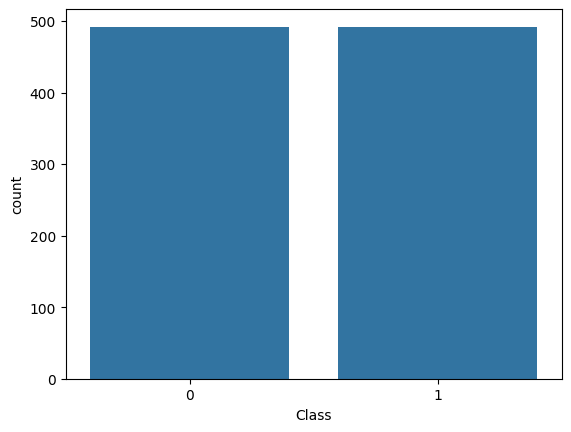

In [12]:
# Finishing undersampling the dataset
sns.countplot(x='Class', data=new_df)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in new_df.columns:
  if i != 'Class':
    new_df[i] = scaler.fit_transform(new_df[[i]])

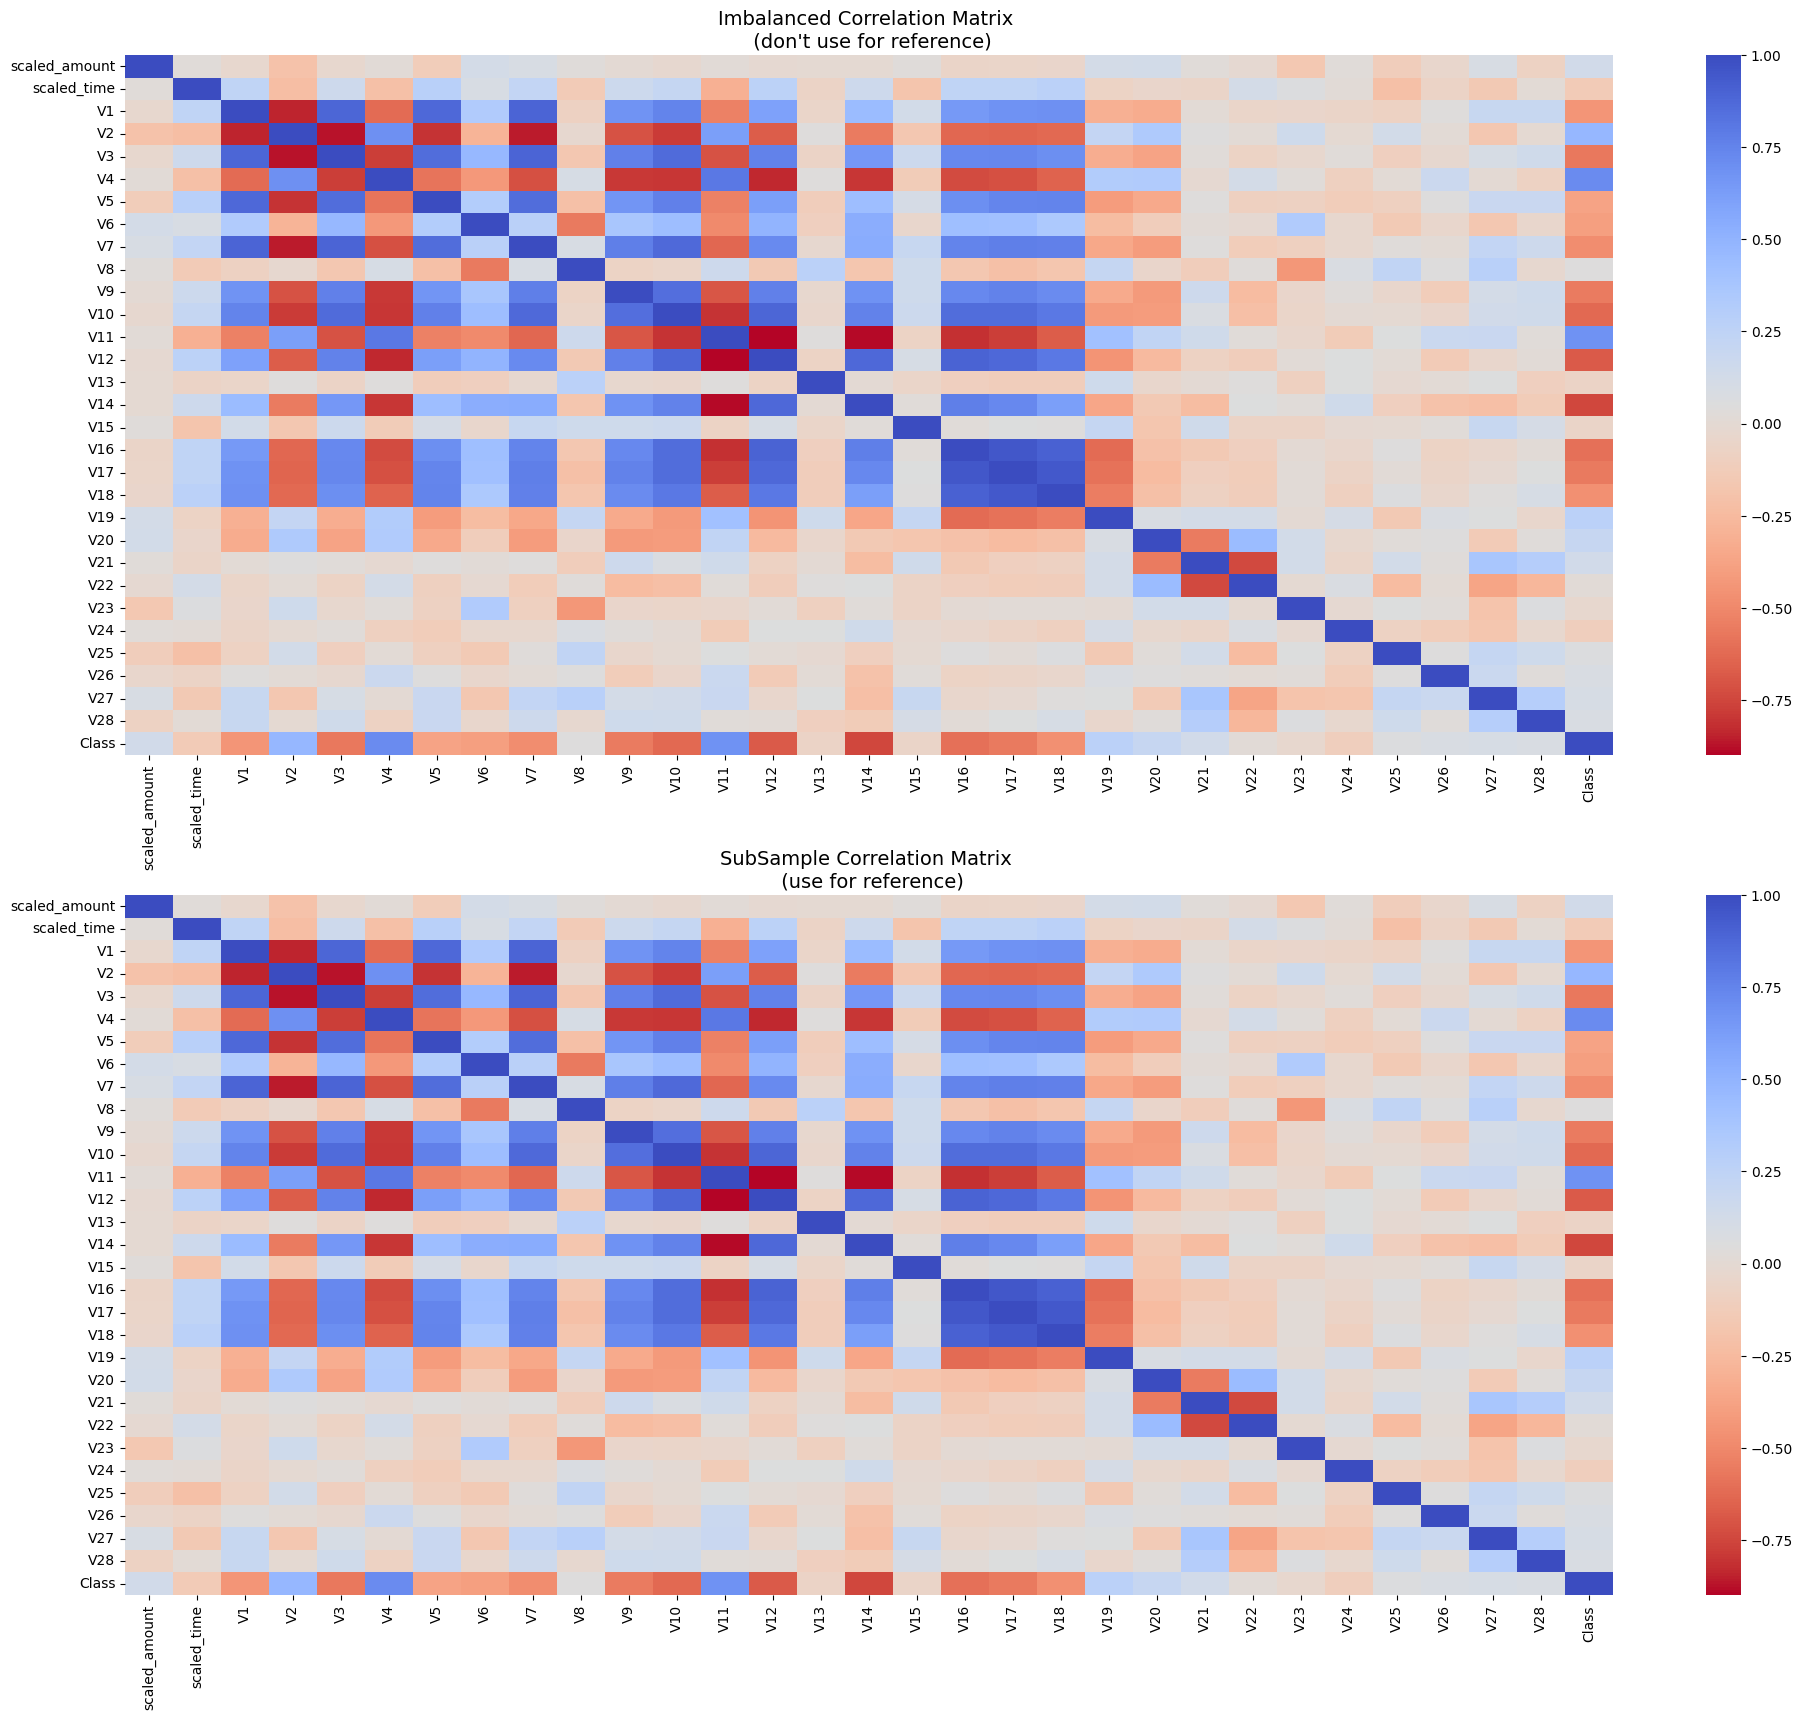

In [16]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = new_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

/var/folders/qn/yzftqp112g70kn5b9zk2y7b00000gn/T/ipykernel_23148/2779172976.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
/var/folders/qn/yzftqp112g70kn5b9zk2y7b00000gn/T/ipykernel_23148/2779172976.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

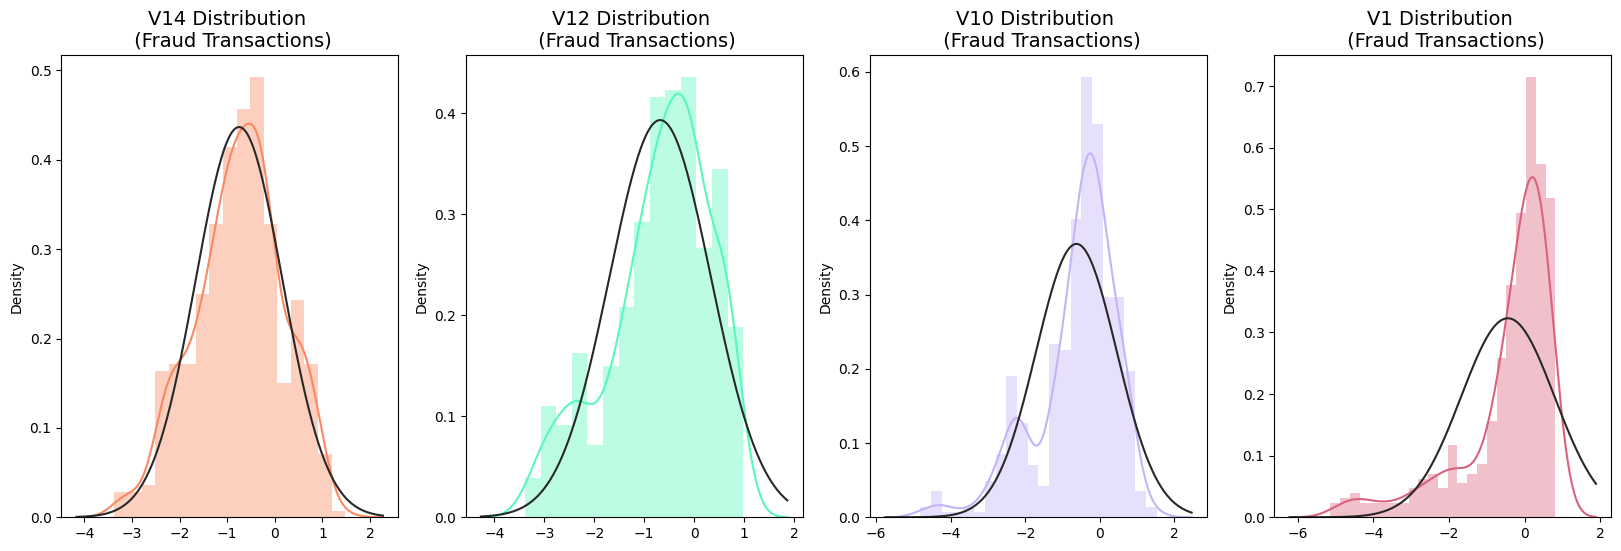

In [17]:
from scipy.stats import norm

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

v1_fraud_dist = new_df['V1'].loc[new_df['Class'] == 1].values
sns.distplot(v1_fraud_dist,ax=ax4, fit=norm, color='#DA627D')
ax4.set_title('V1 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

### **Train-Test-Split: Working on the dataset**

These method for training, processing the dataset, to match the usage need. By splitting the dataset, we'll have a glimpse of what the dataset working on

In [18]:
# Splitting the dataset.

from sklearn.model_selection import train_test_split
X = new_df.drop('Class', axis = 1)
y = new_df['Class']

df2 = new_df.copy()
df3 = new_df.copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=10)

In [19]:
# Print out to get the glimpse of what on the dataset

print(X.shape, X_train.shape, X_test.shape)

(984, 30) (492, 30) (492, 30)


With the above the dataset, the testing method function will take it out 31743 non fraudulent, and 30 transaction as the fraudulent transaction

In [20]:
# Using the Isolation Forest to recording the anomaly of the dataset

from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

iso = IsolationForest(n_estimators= 100, contamination= 0.0016, random_state= 28)
iso.fit(X)

df2['anomaly'] = iso.predict(X)
df2['anomaly'] = df2['anomaly'].map({1:0, -1:1})

In [22]:
pd.DataFrame(df2)

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,anomaly
35686,-0.376702,-1.023168,0.350163,-0.385271,0.809305,-0.676018,0.211380,0.857160,0.341171,0.101311,...,-0.012726,0.788935,-0.056901,-1.142541,-0.702379,0.978773,-0.094515,-0.149124,0,0
252124,-0.442177,1.421247,0.075503,0.752384,-0.584225,1.083005,0.619494,-1.432360,0.087087,0.174110,...,0.096622,-0.459347,-0.300150,-1.112555,-0.045696,0.045973,0.496706,0.613719,1,0
29973,-0.355195,-1.075203,0.654780,-0.824300,0.608786,-1.352073,0.128703,0.488016,0.331124,-0.023082,...,-0.312239,-0.686719,0.142729,-0.423228,0.253469,-0.331439,-0.002489,-0.086405,0,0
10484,-0.427775,-1.460994,0.625384,-0.279182,0.622534,0.290740,0.416422,0.282849,0.470404,-0.073045,...,-0.273627,-0.682125,0.079612,0.353755,0.526162,-0.272540,-0.056888,0.032176,1,0
223366,-0.441080,1.165066,0.630844,0.048410,-0.056736,0.999594,0.391618,-0.178762,0.164699,0.037024,...,-0.016141,-0.143014,-0.007826,-0.564343,0.290063,0.212581,0.425194,0.528693,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16863,3.039433,-1.230893,-0.080993,-0.549347,0.317588,0.350341,-0.426849,0.738267,0.526327,0.129021,...,0.197914,-0.206083,1.550864,0.442021,0.235247,-0.578443,0.148319,0.520333,1,0
15204,0.030978,-1.265986,-3.068726,2.762687,-2.958846,1.198195,-3.136129,-2.079700,-2.155052,2.586221,...,0.509699,-1.156146,-0.658890,0.268417,1.948192,-0.492951,1.531560,1.073107,1,0
218952,-0.422052,1.127247,0.280115,-0.460027,0.665968,-1.155795,1.008118,2.723391,0.419736,0.172890,...,-0.178383,-0.514161,-0.143270,1.193603,0.524225,-0.848175,0.016055,0.077094,0,0
42756,-0.445849,-0.960496,-1.513303,1.119210,-1.314018,2.045015,-1.529060,-1.662281,-1.856954,1.257626,...,0.807519,0.182724,-1.453846,1.013113,-0.041083,0.712478,0.200310,-0.468897,1,0


### **Understanding the Sampling Method**

The dataset we work imbalanced, because of the inequality of the fraudalent - non-fraudulent. We need to Scale the dataset to, with SMOTE (to balanced out the imbalanced one), by multiplying the fraudent one to match the scale of the non-fraudulent.

Understanding SMOTE:

Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated

```Reference: https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets```

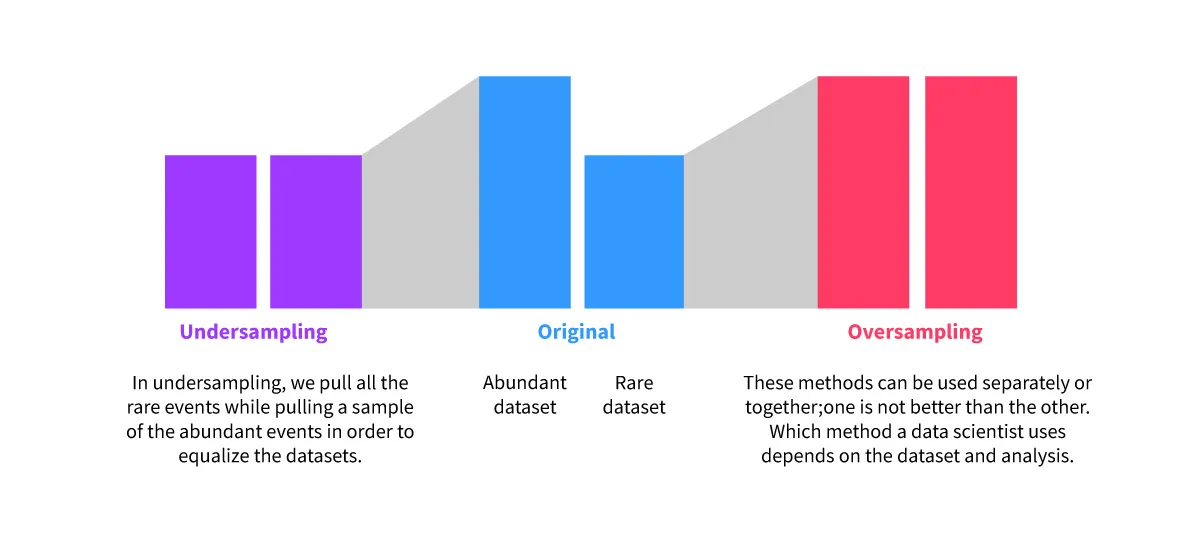

## **Undersampling Model training**

### **Using Logistic Regression**

This logistic regression is the based model that most of use will be using during the first section of the

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
# Using the LogisticRegression as the methodology of training model

model = LogisticRegression()
model2 = LogisticRegression(solver='saga', random_state=10)

model.fit(X_train, Y_train)
model2.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

X_train_prediction_2 = model2.predict(X_train)
training_data_accuracy_2 = accuracy_score(X_train_prediction_2, Y_train)
print("Logistic Regression Training Data Accuracy: ", round(training_data_accuracy, 2) * 100, "%")
print("Logistic Regression Training Data Accuracy (Model2): ", round(training_data_accuracy_2, 2) * 100, "%")

Logistic Regression Training Data Accuracy:  95.0 %
Logistic Regression Training Data Accuracy (Model2):  95.0 %


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [25]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("Logistic Regression Testing Data Accuracy", round(test_data_accuracy, 2) * 100, "%")

Logistic Regression Testing Data Accuracy 95.0 %


After testing with multiple dataset and model training with Logistic Regression can learning up-to ```0.99%``` with this dataset, and compare with the training data accuracy of ```0.998%```

The margin of those result are comparably small. So with Logistic Regression, the data result are fairly accurate


### **Using Decision Tree Classifier**

The Decision Tree is a way to split out the training the dataset, each of every node will split to 2 type of statement, testing out all of the testing purpose to find out hte model working for the dataset. 


In [26]:
decision_model = DecisionTreeClassifier()

decision_model.fit(X_train, Y_train)

prediction = decision_model.predict(X_test)

In [27]:
test_data = accuracy_score(prediction, Y_test)
print("Prediction using the DecisionTree Classifier",test_data)

Prediction using the DecisionTree Classifier 0.9390243902439024


As the decision model: The dataset prediction more accurate, with the testing data

### **Using the K-Neighbor Classifier**

In [28]:
K_model = KNeighborsClassifier()

K_model.fit(X_train, Y_train)

K_prediction = K_model.predict(X_test)

In [29]:
K_test_data = accuracy_score(K_prediction, Y_test)
print("Prediction using the K-Nearest Neighbor: ", K_test_data)

Prediction using the K-Nearest Neighbor:  0.9146341463414634


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline



from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]

# Turn into an array
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(Y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(Y_test, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(Y_train))
print(test_counts_label/ len(Y_test))

Train: [195 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430
 431 432 433 434 435 436 437 438 439 440 441

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_reg_sm = LogisticRegression()
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []


for train, test in sss.split(X_train, Y_train):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(X_train[train], Y_train[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(X_train[test])
    
    accuracy_lst.append(pipeline.score(X_train[test], Y_train[test]))
    precision_lst.append(precision_score(Y_train[test], prediction))
    recall_lst.append(recall_score(Y_train[test], prediction))
    f1_lst.append(f1_score(Y_train[test], prediction))
    
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

accuracy: 0.9365395468838184
precision: 0.9738190931875144
recall: 0.8985069782538136
f1: 0.9337923666019762
